In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
#이미지 로드 및 라벨링
import glob
from PIL import Image
all_images = []
all_labels = []
img_size = (96, 96)
for f in glob.glob('c:\\data\\foods\\**\\*.jpg', recursive=True):
    arr = f.split('\\')
    img = Image.open(f)
    img_resize = img.resize((img_size[0], img_size[1]))
    all_images.append(img_resize)
    label = 0
    if arr[3] == 'Chicken':
        label = 0
    elif arr[3] == 'Dolsot':
        label = 1
    elif arr[3] == 'Jeyug':
        label = 2
    elif arr[3] == 'Kimchi':
        label = 3
    elif arr[3] == 'Samgyeob':
        label = 4
    elif arr[3] == 'Soybean':
        label = 5
    all_labels.append(label)

In [3]:
import numpy as np
X = np.empty((1, img_size[0], img_size[1], 3))
for img in all_images:
    X = np.vstack((X, np.array(img).reshape(1, img_size[0], img_size[1], 3)))
X.shape

(179, 96, 96, 3)

In [4]:
X = np.delete(X, (0), axis=0)

In [5]:
X.shape

(178, 96, 96, 3)

In [6]:
y = np.array(all_labels)
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

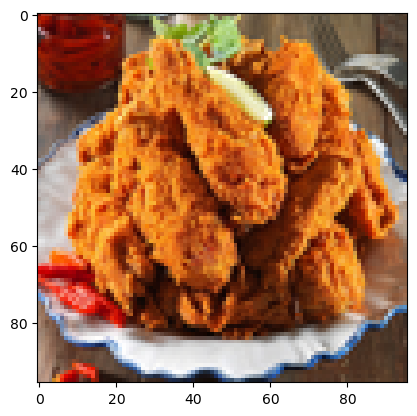

In [7]:
import matplotlib.pyplot as plt
plt.imshow(all_images[0])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, 
                                                    shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 96, 96, 3), (36, 96, 96, 3), (142,), (36,))

In [9]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

0    24
1    24
3    24
4    24
5    24
2    22
dtype: int64

In [10]:
X_trian = X_train.reshape(-1, img_size[0]*img_size[1]*3)
X_test = X_test.reshape(-1, img_size[0]*img_size[1]*3)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [27]:
X_trian = X_train.reshape(-1, img_size[0], img_size[1], 3)
X_test = X_test.reshape(-1, img_size[0], img_size[1], 3)

In [13]:
y_train[:10]

array([3, 5, 5, 5, 2, 0, 5, 2, 1, 2])

In [14]:
from tensorflow.keras import utils
y_train_backup = y_train
y_test_backup = y_test
y_train = utils.to_categorical(y_train, 6)
y_test = utils.to_categorical(y_test, 6)

In [15]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [34]:
#CNN모델
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()
model.add(Conv2D(64, (3,3), padding='same', input_shape=X_train.shape[1:], activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3,3), activation='tanh'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 96, 96, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 flatten_2 (Flatten)         (None, 7056)             

In [35]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('c:/data/model/food_best.h5', monitor='val_accuracy',
                             verbose=1, save_best_only=True, mode='max')
hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[checkpoint])

Epoch 1/100
3/4 [=====================>........] - ETA: 0s - loss: 3.2959 - accuracy: 0.2604
Epoch 1: val_accuracy improved from -inf to 0.24138, saving model to c:/data/model\food_best.h5
4/4 [==============================] - 1s 101ms/step - loss: 3.2435 - accuracy: 0.2566 - val_loss: 1.8823 - val_accuracy: 0.2414
Epoch 2/100
3/4 [=====================>........] - ETA: 0s - loss: 2.9079 - accuracy: 0.1875
Epoch 2: val_accuracy did not improve from 0.24138
4/4 [==============================] - 0s 40ms/step - loss: 3.1029 - accuracy: 0.1858 - val_loss: 2.0866 - val_accuracy: 0.1724
Epoch 3/100
3/4 [=====================>........] - ETA: 0s - loss: 1.9469 - accuracy: 0.1562
Epoch 3: val_accuracy did not improve from 0.24138
4/4 [==============================] - 0s 39ms/step - loss: 1.9326 - accuracy: 0.1504 - val_loss: 1.7987 - val_accuracy: 0.2069
Epoch 4/100
3/4 [=====================>........] - ETA: 0s - loss: 1.6933 - accuracy: 0.2917
Epoch 4: val_accuracy improved from 0.24138 t

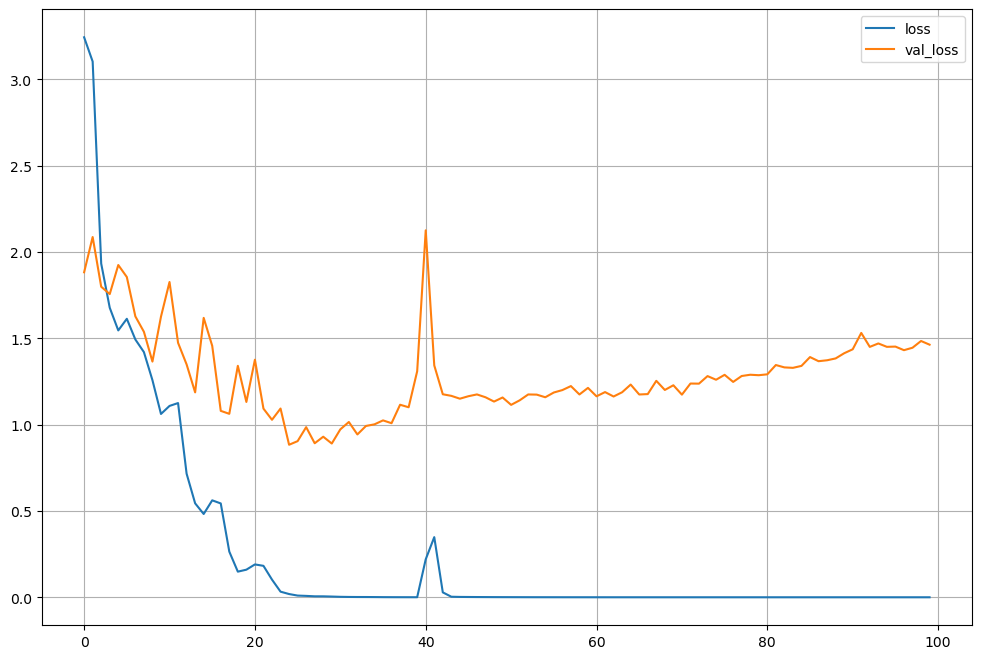

In [36]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()

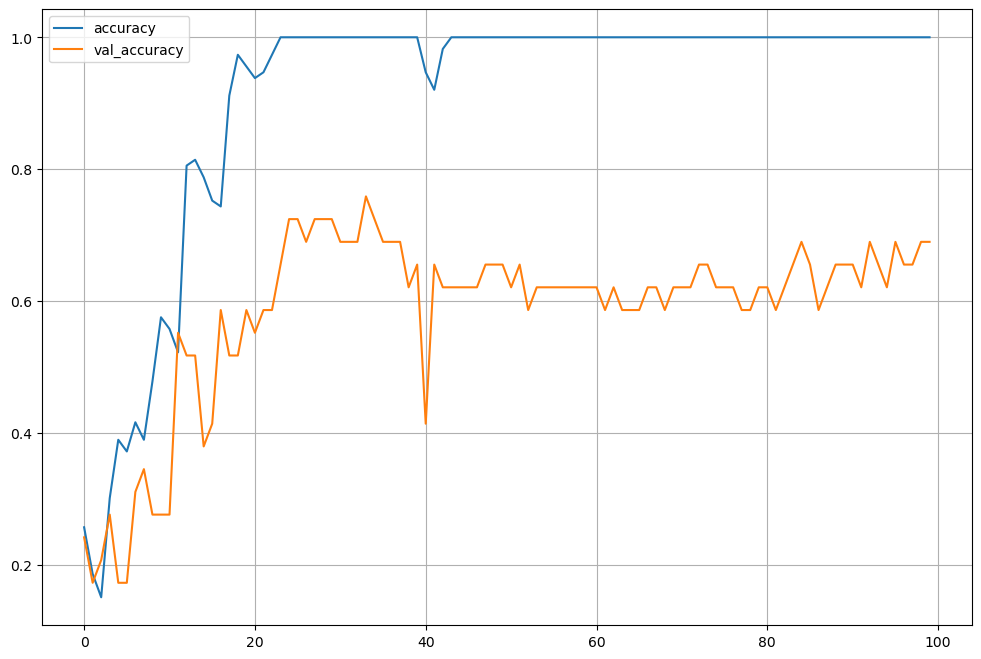

In [37]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()
plt.show()

In [38]:
from tensorflow.keras.models import load_model
model = load_model('c:/data/model/food_best.h5')
scores = model.evaluate(X_train, y_train, verbose=1)
print(scores)
print("학습용 %s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 10ms/step - loss: 0.2036 - accuracy: 0.9507
[0.203605517745018, 0.9507042169570923]
학습용 accuracy: 95.07%


In [39]:
scores = model.evaluate(X_test, y_test, verbose=1)
print(scores)
print("검증용 %s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 4ms/step - loss: 1.9105 - accuracy: 0.5278
[1.9105074405670166, 0.5277777910232544]
검증용 accuracy: 52.78%


In [40]:
pred = model.predict(X_test)
np.argmax(pred, axis=1)

2/2 [==============================] - 0s 7ms/step


array([2, 2, 5, 0, 2, 4, 4, 3, 3, 5, 1, 4, 1, 5, 2, 1, 5, 4, 4, 1, 4, 4,
       5, 3, 4, 4, 3, 3, 2, 4, 2, 5, 2, 3, 3, 2], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_backup, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.75      0.50      0.60         6
           2       0.38      0.50      0.43         6
           3       0.43      0.50      0.46         6
           4       0.60      1.00      0.75         6
           5       0.50      0.50      0.50         6

    accuracy                           0.53        36
   macro avg       0.61      0.53      0.50        36
weighted avg       0.61      0.53      0.50        36

